# Nasdaq Stock Analysis


For this notebook I am going to explore some prices of famous companies listed on the NASDAQ Stock exchange in New York. 
For this I have chosen the following - Google, Netflix, Amazon, Facebook, Tesla Motors and Twitter.
<br><br>In this analysis we will be looking for prices over time, returns and correlation between these stocks over a 4 year period.

For this analysis we are going to use a few tools including Pandas for data management, seaborn for data plotting.

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
import datetime


%matplotlib inline

Firstly we are going to extract the data using a pandas feature called Pandas Data Reader. This allows for the extraction of financial data from google. We have to extract the data sets one at a time.

In [240]:
start = datetime.datetime(2013, 1, 1)
finish = datetime.datetime(2017,6, 1)


GOOG = data.DataReader("GOOG", 'google', start, finish)
FB = data.DataReader("FB", 'google', start, finish)
AMZN = data.DataReader("AMZN", 'google', start, finish)
NFLX= data.DataReader("NFLX", 'google', start, finish)
TWTR= data.DataReader("TWTR", 'google', start, finish)
TSLA= data.DataReader("TSLA", 'google', start, finish)



Lets examine some of the data we have just pulled from Google. We can use this by using the head method. For this analysis we only want to look at the closing prices.

In [241]:
stocks = pd.DataFrame({"FB": FB["Close"],
                       "GOOG": GOOG["Close"],
                      "AMZN": AMZN["Close"],
                      "NFLX": NFLX["Close"],
                      "TWTR": TWTR["Close"],
                       "TSLA": TSLA["Close"]
                      })

In [242]:
stocks.head()

,AMZN,FB,GOOG,NFLX,TSLA,TWTR
Date,,,,,,
2013-01-02,257.31,NaN,361.26,13.14,35.36,NaN
2013-01-03,258.48,NaN,361.47,13.80,34.77,NaN
2013-01-04,259.15,NaN,368.62,13.71,34.40,NaN
2013-01-07,268.46,NaN,367.01,14.17,34.34,NaN
2013-01-08,266.38,NaN,366.28,13.88,33.68,NaN


Looking this, it shows that there a NA values in the data set - but this is expected as Facebook and Twitter were not listed in 2013

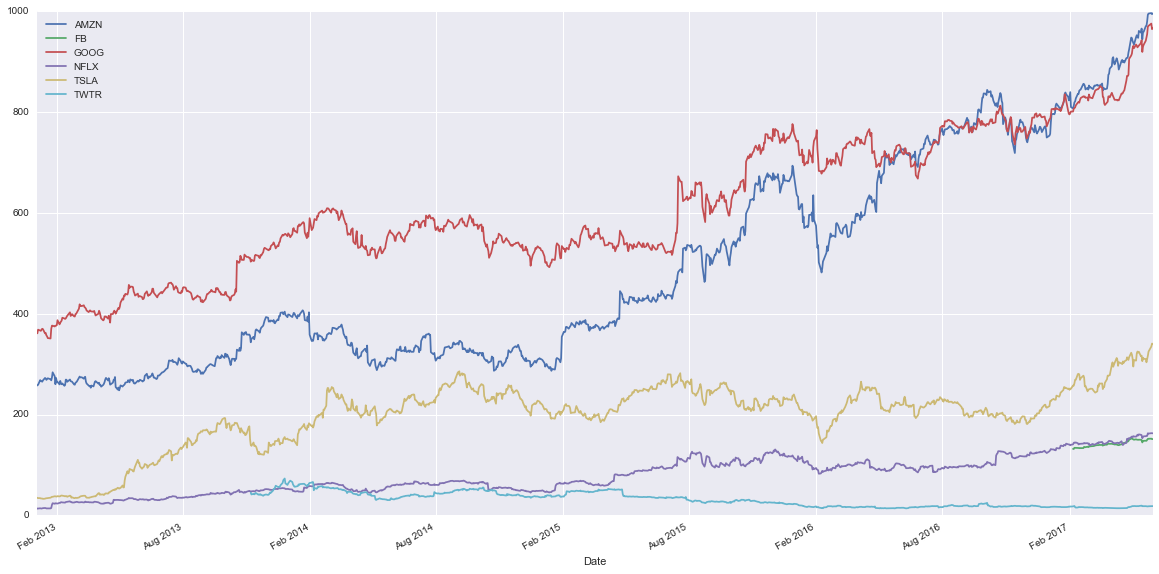

In [253]:
stocks.plot(figsize=(20,10),grid = True)

<B>Lets calculate the return for these stocks over the period of the data set</B><Br><Br>
A return is the gain or loss of a security in a particular period. The return consists of the income and the capital gains relative on an investment, and it is usually quoted as a percentage. 

Create a new data frame for this purpose. We then will use the lambda function to create a function that will create the percent gain. 

In [254]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,AMZN,FB,GOOG,NFLX,TSLA,TWTR
Date,,,,,,
2013-01-02,1.000000,NaN,1.000000,1.000000,1.000000,NaN
2013-01-03,1.004547,NaN,1.000581,1.050228,0.983314,NaN
2013-01-04,1.007151,NaN,1.020373,1.043379,0.972851,NaN
2013-01-07,1.043333,NaN,1.015917,1.078387,0.971154,NaN
2013-01-08,1.035249,NaN,1.013896,1.056317,0.952489,NaN


Now we have a data set we can plot it using in built pandas plotting.

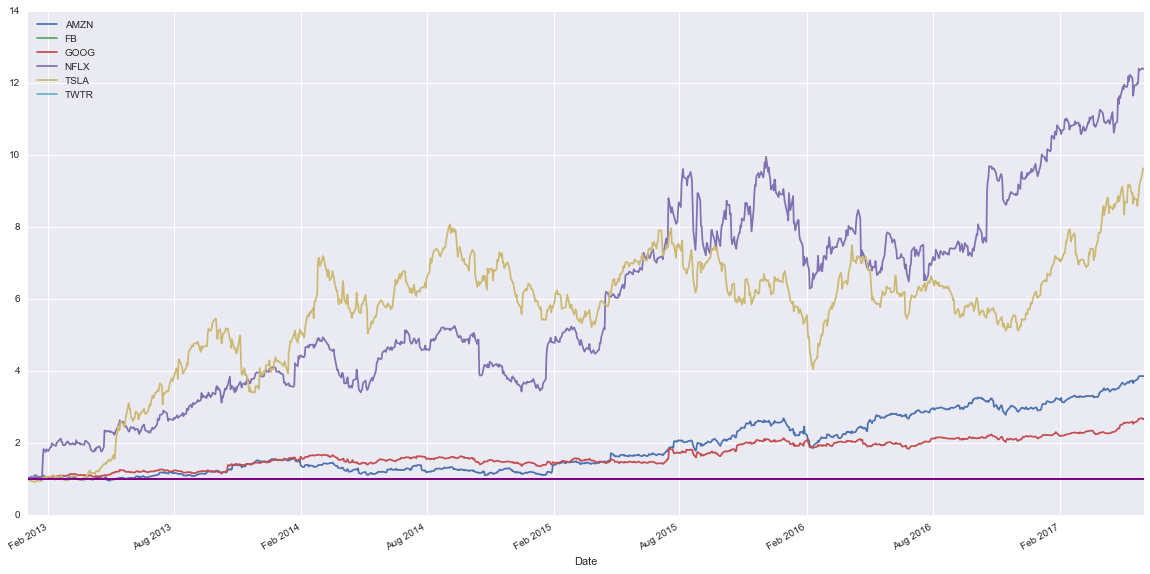

In [256]:
returns.plot(grid = True, figsize=(20,10)).axhline(y = 1, color = "Purple", lw = 2)

This chart is basically telling us that if we invested a dollar in each of these at the start of 2013 - netflix would of been the clear winner netting over 12 times the original investment



Using this returns DataFrame, figure out on what dates each bank stock had the WORST and BEST single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day\
For this we can use the Pandas function of idxmax. This provides the highest value in the data set.

In [248]:
returns.idxmax()

AMZN   2017-05-30
FB            NaT
GOOG   2017-05-30
NFLX   2017-05-30
TSLA   2017-05-31
TWTR          NaT
dtype: datetime64[ns]

In [249]:
returns.idxmin()

AMZN   2013-05-01
FB            NaT
GOOG   2013-01-22
NFLX   2013-01-02
TSLA   2013-01-11
TWTR          NaT
dtype: datetime64[ns]

Now we should take a look at the standard deviation of the returns which will show which would be the most risky in terms of Standard deviation. For this we can use the standard deviation method

In [257]:
returns.loc['2013-01-01':'2017-06-01'].std().idxmax()

'NFLX'

The code chose Netflix as the stock that had the highest standard deviation from the return. You can see this in the chart if you look at the ups and downs in the share price.

<b>Create a heatmap of the correlation between the stocks Close Price.</b><br><br>
We can see how closely related the movement of the stock prices by looking at the Correlation of the stock against each other. A good method of plotting this is called a Seaborn Heatmap. The closer to 1 to more correlated the stocks are. Since stock markets generally follow the trend - it is not surprising to see a strong correlation in most cases.

In [251]:
Stock_close_corr = stocks.corr()

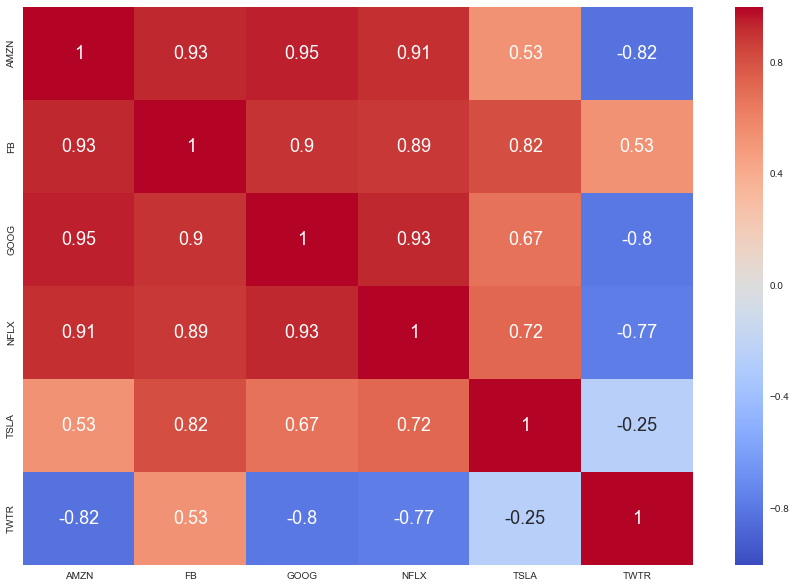

In [252]:
plt.figure(figsize=(15, 10))
sns.heatmap(Stock_close_corr, annot = True, cmap='coolwarm',annot_kws={"size":18})

Looking at the Blue (negative) squares these all involve twitter and since twitter is the only share that has declined over the last few years this makes sense.